# Trainingsdaten erzeugen

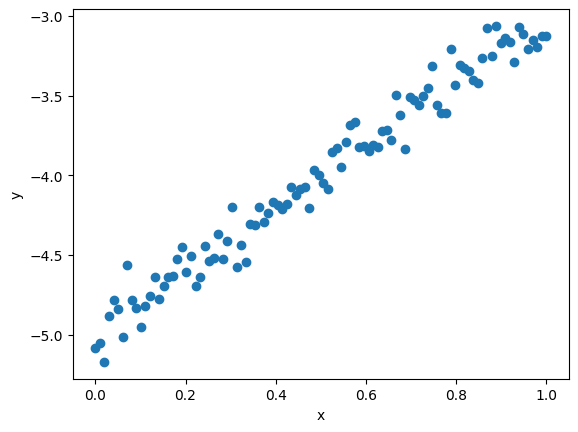

In [12]:
import numpy as np
x = np.linspace(0.0, 1.0, 100)
y = -5 + 2*x + 0.1*np.random.randn(len(x))

import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


# MLP mit TensorFlow/Keras

2025-11-03 16:14:33.972076: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-03 16:14:34.067127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762182874.103172    6913 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762182874.113197    6913 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762182874.195503    6913 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

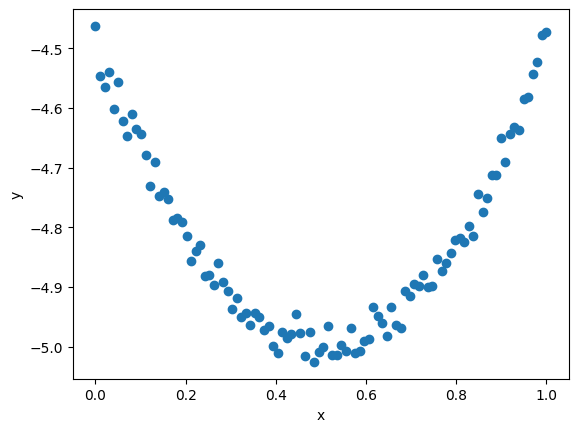

Model: "MyFirstMLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

I0000 00:00:1762182877.341806    8970 service.cc:152] XLA service 0x7d29d8009ac0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762182877.341916    8970 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-11-03 16:14:37.392866: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762182877.591760    8970 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


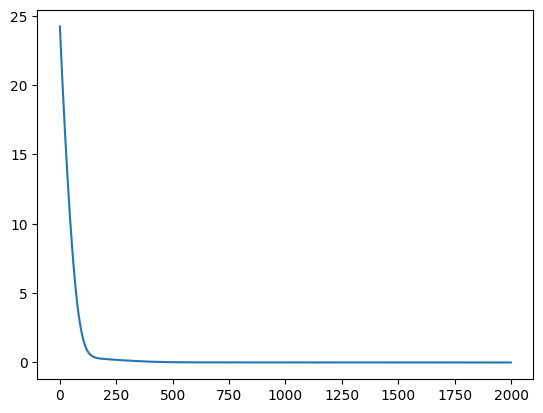

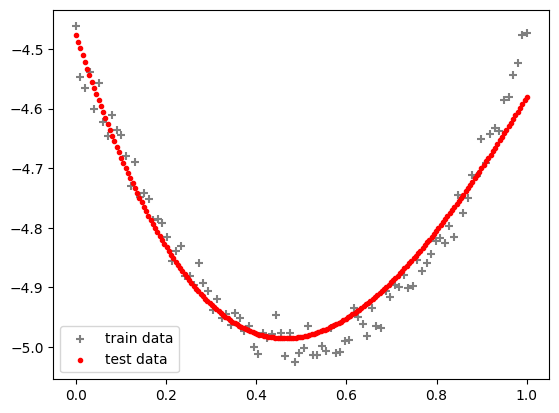

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


# 1. Trainingsdaten vorbereiten
x = np.linspace(0.0, 1.0, 100)
#y = -5 + 2*x + 0.1*np.random.randn(len(x))
y = -5 + 2*(x-0.5)**2 + 0.02*np.random.randn(len(x))
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 2. Modell trainieren
model = tf.keras.Sequential(name="MyFirstMLP")
model.add(tf.keras.layers.InputLayer(shape=(1,)))
model.add(tf.keras.layers.Dense(10, activation="tanh", name="hidden1"))
model.add(tf.keras.layers.Dense(1, name="output"))
myoptimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mse", optimizer=myoptimizer)
model.summary()
h = model.fit(x,y, epochs=2000, verbose=0)

plt.plot(h.history["loss"])
plt.show()

# 3. Modell testen / Testprädiktionen visualisieren
x_test = np.linspace(0,1,200).reshape(200,1)
y_preds = model.predict( x_test, verbose=0 )
plt.scatter(x,y, marker="+", color="gray", label="train data")
plt.scatter(x_test.flatten(), y_preds.flatten(), marker=".", color="red", label="test data")
plt.legend()
plt.show()



# MLP mit PyTorch

Your device for the model today is: cuda


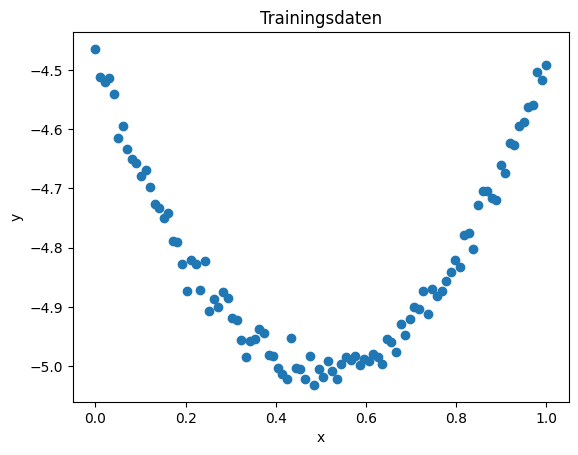

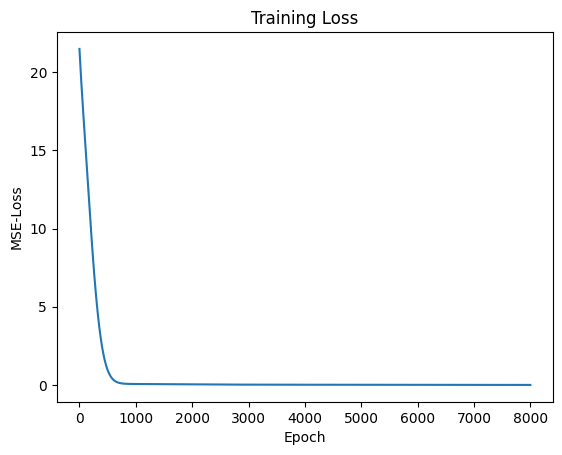

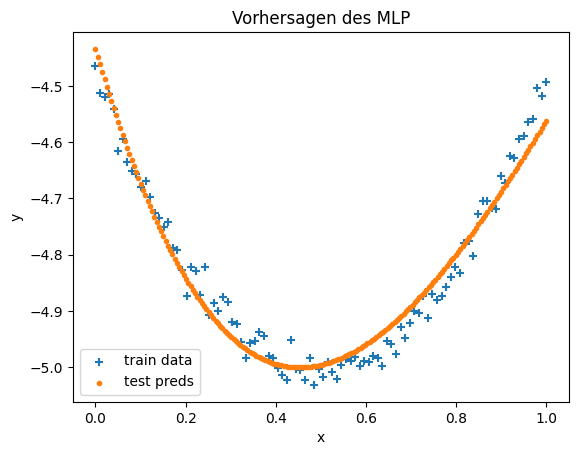

In [8]:
# PyTorch-Version deines Beispiels
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Reproduzierbarkeit
torch.manual_seed(0)
np.random.seed(0)

# 0. Device festlegen (hier absichtlich CPU, analog zu deinem TF-Code ohne GPU)
#device = torch.device("cpu")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Your device for the model today is: {device}")

# 1. Daten vorbereiten (wie bei dir)
x_np = np.linspace(0.0, 1.0, 100).astype(np.float32)
# y_np = -5 + 2*x_np + 0.1*np.random.randn(len(x_np)).astype(np.float32)
y_np = -5 + 2*(x_np - 0.5)**2 + 0.02*np.random.randn(len(x_np)).astype(np.float32)

# Für PyTorch: (N, 1)-Form
x = torch.from_numpy(x_np).unsqueeze(1).to(device)  # shape: [100, 1]
y = torch.from_numpy(y_np).unsqueeze(1).to(device)  # shape: [100, 1]

plt.scatter(x_np, y_np)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trainingsdaten")
plt.show()

# 2. Modell definieren & trainieren
model = nn.Sequential(
    nn.Linear(1, 10),   # input -> hidden
    nn.Tanh(),
    nn.Linear(10, 1)    # hidden -> output
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 8000
loss_history = []

model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    pred = model(x)           # Vorwärts
    loss = criterion(pred, y) # Loss
    loss.backward()           # Gradienten
    optimizer.step()          # Update
    loss_history.append(loss.item())
    

# Trainingskurve
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE-Loss")
plt.title("Training Loss")
plt.show()

# 3. Testprädiktionen visualisieren
model.eval()
with torch.no_grad():
    x_test_np = np.linspace(0.0, 1.0, 200).astype(np.float32)
    x_test = torch.from_numpy(x_test_np).unsqueeze(1).to(device)
    y_pred = model(x_test).cpu().numpy().flatten()

plt.scatter(x_np, y_np, marker="+", label="train data")
plt.scatter(x_test_np, y_pred, marker=".", label="test preds")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Vorhersagen des MLP")
plt.show()


# PyTorch MLP Variante 2 (mit Mini-Batches)

In [9]:
!pip install imageio

Your device for the model today is: cuda


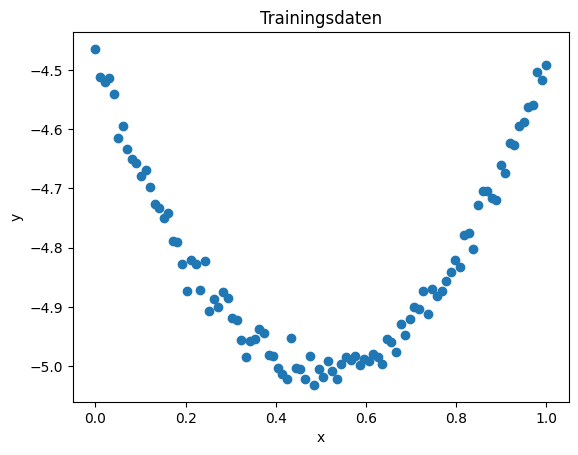

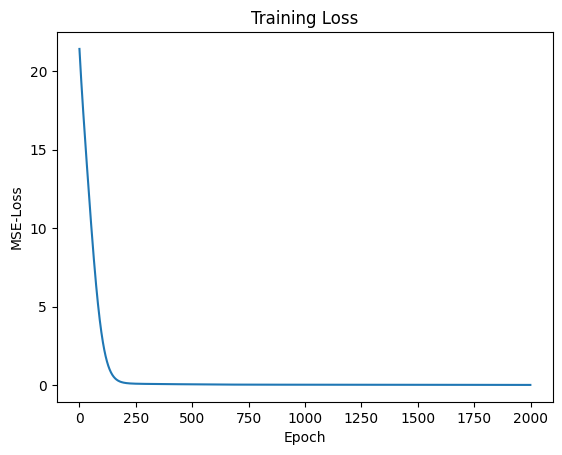

Animated GIF gespeichert unter: training_predictions.gif


In [ ]:
# PyTorch-Version mit Mini-Batches + GIF-Snapshots
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Optional: imageio zum GIF-Bauen (Pillow reicht auch, aber imageio ist bequem)
import imageio.v2 as imageio

# Reproduzierbarkeit
torch.manual_seed(0)
np.random.seed(0)

# Device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Your device for the model today is: {device}")

# 1) Daten vorbereiten
x_np = np.linspace(0.0, 1.0, 100).astype(np.float32)
y_np = (-5 + 2*(x_np - 0.5)**2 + 0.02*np.random.randn(len(x_np))).astype(np.float32)

x = torch.from_numpy(x_np).unsqueeze(1).to(device)  # [100, 1]
y = torch.from_numpy(y_np).unsqueeze(1).to(device)  # [100, 1]

plt.scatter(x_np, y_np)
plt.xlabel("x"); plt.ylabel("y"); plt.title("Trainingsdaten")
plt.show()

# DataLoader (Mini-Batch = 32)
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(x, y)


loader = DataLoader(dataset, batch_size=32)

# Test-Gitter (fix, damit die Snapshots vergleichbar sind)
x_test_np = np.linspace(0.0, 1.0, 200).astype(np.float32)
x_test = torch.from_numpy(x_test_np).unsqueeze(1).to(device)

# Plot-Limits stabil halten (damit das GIF nicht "springt")
y_min = min(y_np.min(), (-5 + 2*(x_test_np - 0.5)**2).min()) - 0.5
y_max = max(y_np.max(), (-5 + 2*(x_test_np - 0.5)**2).max()) + 0.5

# Ordner für Frames (optional)
os.makedirs("frames", exist_ok=True)
frame_paths = []

# 2) Modell + Training
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 1)
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 2000
loss_history = []

model.train()
for epoch in range(1, num_epochs + 1):
    epoch_loss = 0.0
    # Mini-Batch-Loop
    for xb, yb in loader:
        optimizer.zero_grad(set_to_none=True)
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)  # Summe über Samples

    epoch_loss /= len(dataset)
    loss_history.append(epoch_loss)

    # Alle 100 Epochen: Snapshot der Testprädiktionen speichern
    if epoch % 100 == 0 or epoch == 1:
        model.eval()
        with torch.no_grad():
            y_pred = model(x_test).cpu().numpy().flatten()

        plt.figure(figsize=(6,4))
        plt.scatter(x_np, y_np, marker="+", label="train data")
        plt.scatter(x_test_np, y_pred, marker=".", label=f"test preds (epoch {epoch})")
        plt.xlim(0.0, 1.0)
        plt.ylim(y_min, y_max)
        plt.xlabel("x"); plt.ylabel("y"); plt.legend()
        plt.title(f"Vorhersagen des MLP – Epoch {epoch}")
        frame_path = os.path.join("frames", f"pred_epoch_{epoch:04d}.png")
        plt.savefig(frame_path, dpi=130, bbox_inches="tight")
        plt.close()
        frame_paths.append(frame_path)
        model.train()

# Trainingskurve anzeigen
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch"); plt.ylabel("MSE-Loss"); plt.title("Training Loss")
plt.show()

# 3) GIF aus allen gespeicherten Frames bauen
if frame_paths:
    images = [imageio.imread(p) for p in frame_paths]
    # Dauer pro Frame (Sekunden) – gerne anpassen
    imageio.mimsave("training_predictions.gif", images, duration=0.5)
    print(f"Animated GIF gespeichert unter: training_predictions.gif")
else:
    print("Keine Frames gefunden – wurde epoch % 100 erreicht?")


In [16]:
for name, p in model.named_parameters():
    print(name)
    print(p)
    print("---")

0.weight
Parameter containing:
tensor([[-0.5276],
        [ 0.7434],
        [-2.1221],
        [-1.7226],
        [-1.4062],
        [ 1.2999],
        [-0.2956],
        [ 1.7785],
        [ 0.5450],
        [ 0.6533]], device='cuda:0', requires_grad=True)
---
0.bias
Parameter containing:
tensor([-0.9565, -0.7631, -0.8190, -0.8243, -0.8843,  0.7071,  0.0985,  0.7394,
        -0.7628, -0.9684], device='cuda:0', requires_grad=True)
---
2.weight
Parameter containing:
tensor([[ 0.6869,  1.0250,  0.4411,  0.7475,  0.5050, -0.6471, -0.1297, -0.8108,
          0.3192,  0.6413]], device='cuda:0', requires_grad=True)
---
2.bias
Parameter containing:
tensor([-0.5860], device='cuda:0', requires_grad=True)
---
